In [34]:
%matplotlib inline

from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray as xr
import xbout
import scipy
import re
import netCDF4 as nc

onedrive_path = onedrive_path = str(os.getcwd()).split("OneDrive")[0] + "OneDrive"
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\sdtools"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\soledge"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages"))


# from gridtools.hypnotoad_tools import *
from gridtools.b2_tools import *
from gridtools.utils import *

from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
from code_comparison.viewer_2d import *
from code_comparison.code_comparison import *

import gridtools.solps_python_scripts.setup
from gridtools.solps_python_scripts.plot_solps       import plot_1d, plot_2d, plot_wall_loads
from gridtools.solps_python_scripts.read_ft44 import read_ft44
import ipywidgets as widgets

%load_ext autoreload
%autoreload 2


print("Done")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Done


In [4]:
path = os.path.join(onedrive_path, r"Project\collab\tech\compare_data\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16")

In [33]:
p = SOLPSplot(path, "ti")
d = nc.Dataset(path)

b2fgmtry loaded from .pkl


NameError: name 'nc' is not defined

In [35]:
d = nc.Dataset(os.path.join(path, "balance.nc"))
g = read_b2fgmtry(where=path)

In [97]:
%matplotlib inline

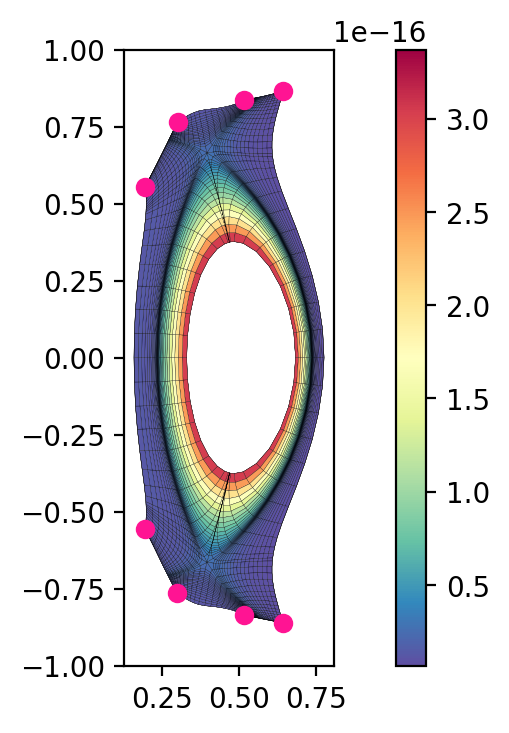

In [113]:
crx = d["crx"]
cry = d["cry"]

plt.close("all")
fig, ax = plt.subplots(dpi = 200, figsize = (8,4))
p.plot(fig = fig, ax = ax, antialias = True, linewidth = 0.1)
ax.set_ylim(-1,1)

upper_break = int(np.mean([g["rightcut"][1], g["leftcut"][0]]))

# upper_break = g["rightcut"].max() - g["leftcut"].min()


# upper_break = g["rightcut"].min() - g["leftcut"].max() +4 

bounds = {
    # It' [corner, radial(logical y), poloidal(logical x)]
    "inner_lower_inner_corner" : [1, 0, 0],
    "inner_lower_outer_corner" : [1, -1, 0],
    "inner_upper_outer_corner" : [1, -1, upper_break + 10],
    "inner_upper_inner_corner" : [1, 0, upper_break + 10],
    "outer_upper_inner_corner" : [1, 0, upper_break + 11],
    "outer_upper_outer_corner" : [1, -1, upper_break + 11],
    "outer_lower_outer_corner" : [1, -1, -1],
    "outer_lower_inner_corner" : [1, 0, -1],
}
rz_extents = dict()

for name in bounds:
    p1 = bounds[name]
    rz_extents[name] = dict()
    rz_extents[name]["R"] = crx[p1[0], p1[1], p1[2]]
    rz_extents[name]["Z"] = cry[p1[0], p1[1], p1[2]]
    
    ax.scatter(crx[p1[0], p1[1], p1[2]], cry[p1[0], p1[1], p1[2]], c = "deeppink")